pandas version: 2.0.3
scikit-learn version: 1.3.0


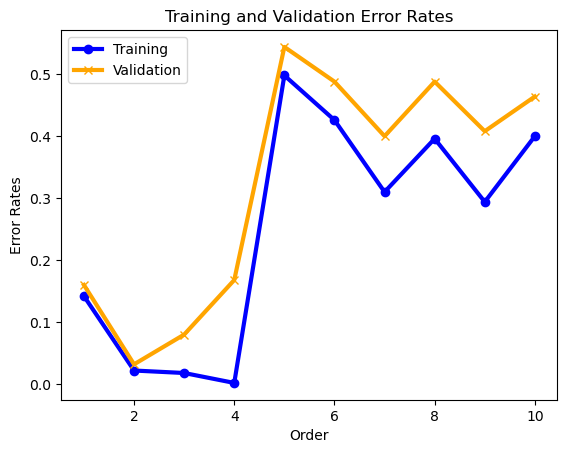

In [1]:
##--- load data from scikit ---##
import numpy as np
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
from sklearn.datasets import load_iris
iris_dataset = load_iris()
X = np.array(iris_dataset['data'])
y = np.array(iris_dataset['target'])
## one-hot encoding
Y = list()
for i in y:
 letter = [0, 0, 0]
 letter[i] = 1
 Y.append(letter)
Y = np.array(Y) 
test_Idx = np.random.RandomState(seed=2).permutation(Y.shape[0])
X_test = X[test_Idx[:25]]
Y_test = Y[test_Idx[:25]]
X = X[test_Idx[25:]]
Y = Y[test_Idx[25:]]
from sklearn.preprocessing import PolynomialFeatures
error_rate_train_array = []
error_rate_val_array = []
##--- Loop for Polynomial orders 1 to 10 ---##
for order in range(1,11):
     error_rate_train_array_fold = []
     error_rate_val_array_fold = []
     # Random permutation of data
     Idx = np.random.RandomState(seed=8).permutation(Y.shape[0])
     # Loop 5 times for 5-fold
     for k in range(0,5):
         ##--- Prepare training, validation, and test data for the 5-fold ---#
         # Prepare indexing for each fold
         X_val = X[Idx[k*25:(k+1)*25]]
         Y_val = Y[Idx[k*25:(k+1)*25]]
         Idxtrn = np.setdiff1d(Idx, Idx[k*25:(k+1)*25])
         X_train = X[Idxtrn]
         Y_train = Y[Idxtrn]
         ##--- Polynomial Classification ---##
         poly = PolynomialFeatures(order)
         P = poly.fit_transform(X_train)
         Pval = poly.fit_transform(X_val)
         if P.shape[0] > P.shape[1]: # over-/under-determined cases
             reg_L = 0.00*np.identity(P.shape[1])
             inv_PTP = np.linalg.inv(P.transpose().dot(P)+reg_L)
             pinv_L = inv_PTP.dot(P.transpose())
             wp = pinv_L.dot(Y_train)
         else:
             reg_R = 0.00*np.identity(P.shape[0])
             inv_PPT = np.linalg.inv(P.dot(P.transpose())+reg_R)
             pinv_R = P.transpose().dot(inv_PPT)
             wp = pinv_R.dot(Y_train)
         ##--- trained output ---##
         y_est_p = P.dot(wp); 
         y_cls_p = [[1 if y == max(x) else 0 for y in x] for x in y_est_p ] 
         m1tr = np.matrix(Y_train)
         m2tr = np.matrix(y_cls_p)
         # training classification error count and rate computation
         difference = np.abs(m1tr - m2tr)
         error_train = np.where(difference.any(axis=1))[0]
         error_rate_train = len(error_train)/len(difference)
         error_rate_train_array_fold += [error_rate_train]
         ##--- validation output ---##
         yval_est_p = Pval.dot(wp); 
         yval_cls_p = [[1 if y == max(x) else 0 for y in x] for x in yval_est_p ] 
         m1 = np.matrix(Y_val)
         m2 = np.matrix(yval_cls_p)
         # validation classification error count and rate computation
         difference = np.abs(m1 - m2)
         error_val = np.where(difference.any(axis=1))[0]
         error_rate_val = len(error_val)/len(difference)
         error_rate_val_array_fold += [error_rate_val]
     # store results for each polynomial order
     error_rate_train_array += [np.mean(error_rate_train_array_fold)] 
     error_rate_val_array += [np.mean(error_rate_val_array_fold)] 
##--- plotting ---##
import matplotlib.pyplot as plt
order=[x for x in range(1,11)]
plt.plot(order, error_rate_train_array, color='blue', marker='o', linewidth=3, 
label='Training')
plt.plot(order, error_rate_val_array, color='orange', marker='x', linewidth=3, 
label='Validation')
plt.xlabel('Order')
plt.ylabel('Error Rates')
plt.title('Training and Validation Error Rates')
plt.legend()
plt.show()
